In [55]:
import xgboost as xgb
from xgboost import XGBClassifier
import pandas as pd
import sklearn
import numpy as np
import graphviz


In [60]:
data = pd.read_csv("/Users/linaelkjaerpedersen/Desktop/Datascience/Exam/R-code/full_df.csv")

print(data)

data = data[ ['id'] + [ col for col in data.columns if col != 'id' ] ]

data.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)

# Then, drop the column as usual.
data.drop(["a"], axis=1, inplace=True)

data

       Unnamed: 0  gender   age  hypertension  heart_disease  smoking_history  \
0               1       0  80.0             0              1                0   
1               2       0  54.0             0              0                5   
2               3       1  28.0             0              0                0   
3               4       0  36.0             0              0                1   
4               5       1  76.0             1              1                1   
...           ...     ...   ...           ...            ...              ...   
99977       99978       0  80.0             0              0                5   
99978       99979       0   2.0             0              0                5   
99979       99980       1  66.0             0              0                3   
99980       99981       0  24.0             0              0                0   
99981       99982       0  57.0             0              0                1   

         bmi  HbA1c_level  

,id,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,0,80.0,0,1,0,25.19,6.6,140,0
1,2,0,54.0,0,0,5,27.32,6.6,80,0
2,3,1,28.0,0,0,0,27.32,5.7,158,0
3,4,0,36.0,0,0,1,23.45,5.0,155,0
4,5,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...,...
99977,99978,0,80.0,0,0,5,27.32,6.2,90,0
99978,99979,0,2.0,0,0,5,17.37,6.5,100,0
99979,99980,1,66.0,0,0,3,27.83,5.7,155,0
99980,99981,0,24.0,0,0,0,35.42,4.0,100,0


In [61]:
X = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values

print(X)
y


[[  0.    80.     0.   ...  25.19   6.6  140.  ]
 [  0.    54.     0.   ...  27.32   6.6   80.  ]
 [  1.    28.     0.   ...  27.32   5.7  158.  ]
 ...
 [  1.    66.     0.   ...  27.83   5.7  155.  ]
 [  0.    24.     0.   ...  35.42   4.   100.  ]
 [  0.    57.     0.   ...  22.43   6.6   90.  ]]


array([0, 0, 0, ..., 0, 0, 0])

In [70]:
#Splitting into test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)

# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
bst_2 = XGBClassifier(objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
bst_2.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)
preds_2 = bst_2.predict(X_test)

correct = 0
false = 0

for i in range(len(preds_2)):
    if preds_2[i] == y_test[i]:
        correct += 1
    else: 
        false += 1


print(correct)
print(false)





19410
587


In [72]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB().fit(X_train, y_train)


print("score on test: " + str(mnb.score(X_test, y_test)))
print("score on train: "+ str(mnb.score(X_train, y_train)))

score on test: 0.8785817872680902
score on train: 0.8808276551853472


In [73]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

print("score on test: " + str(lr.score(X_test, y_test)))
print("score on train: "+ str(lr.score(X_train, y_train)))

score on test: 0.9595939390908637
score on train: 0.9604925923610677


In [74]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)

knn.fit(X_train, y_train)
print("train shape: " + str(X_train.shape))
print("score on test: " + str(knn.score(X_test, y_test)))
print("score on train: "+ str(knn.score(X_train, y_train)))

train shape: (79985, 8)
score on test: 0.9529429414412162
score on train: 0.9624429580546352


In [76]:
from sklearn.svm import LinearSVC
svm=LinearSVC(C=0.0001)
svm.fit(X_train, y_train)
print("score on test: " + str(svm.score(X_test, y_test)))
print("score on train: "+ str(svm.score(X_train, y_train)))

score on test: 0.9150872630894634
score on train: 0.9152591110833281


In [78]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print("score on test: "  + str(clf.score(X_test, y_test)))
print("score on train: " + str(clf.score(X_train, y_train)))

score on test: 0.9508926338950843
score on train: 0.9992373570044384


In [79]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
adb.fit(X_train, y_train)
print("score on test: " + str(adb.score(X_test, y_test)))
print("score on train: "+ str(adb.score(X_train, y_train)))

score on test: 0.9708456268440266
score on train: 0.9728574107645184


In [37]:
#print(np.unique(y_test))
#print(np.unique(preds))

X_train

array([[1, 19.0, 0, ..., 6.5, 158, 0],
       [0, 35.0, 0, ..., 3.5, 159, 0],
       [1, 2.0, 0, ..., 4.8, 80, 0],
       ...,
       [0, 73.0, 1, ..., 3.5, 145, 0],
       [0, 80.0, 0, ..., 6.0, 200, 0],
       [1, 80.0, 0, ..., 4.8, 140, 0]], dtype=object)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

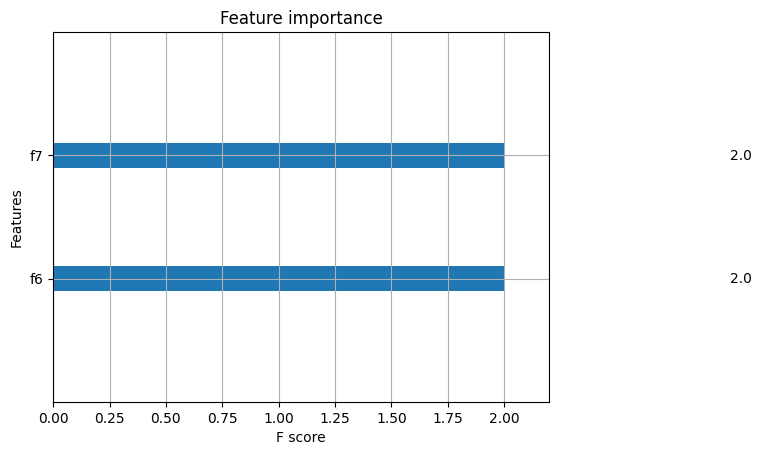

In [65]:
xgb.plot_importance(bst)




IndexError: list index out of range

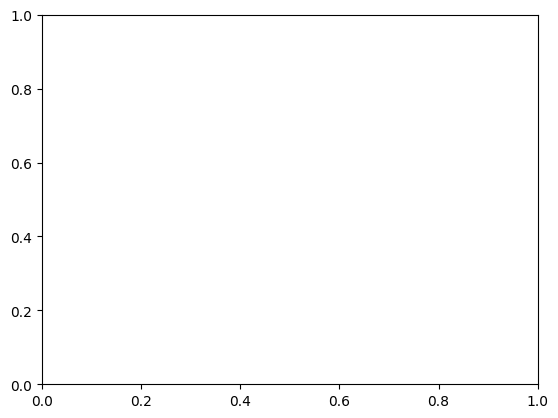

In [66]:
xgb.plot_tree(bst, num_trees=2)

XGBoostError: [10:50:59] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/gbm/../common/common.h:239: XGBoost version not compiled with GPU support.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000120782785 dmlc::LogMessageFatal::~LogMessageFatal() + 117
  [bt] (1) 2   libxgboost.dylib                    0x00000001208838d6 xgboost::gbm::GBTree::ConfigureUpdaters() + 534
  [bt] (2) 3   libxgboost.dylib                    0x000000012087dd8a xgboost::gbm::GBTree::Configure(std::__1::vector<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > >, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > > > > const&) + 1130
  [bt] (3) 4   libxgboost.dylib                    0x00000001208a0c3d xgboost::LearnerConfiguration::Configure() + 1229
  [bt] (4) 5   libxgboost.dylib                    0x00000001208a0f79 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 105
  [bt] (5) 6   libxgboost.dylib                    0x000000012079dc8f XGBoosterUpdateOneIter + 143
  [bt] (6) 7   libffi.dylib                        0x00007ff81dd53882 ffi_call_unix64 + 82
  [bt] (7) 8   ???                                 0x00007ff7b9e78b90 0x0 + 140701952609168

